In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#dane symulowane
np.random.seed(0)
dzien = np.arange(1,366,15)
temp = 10+10*np.sin(2*np.pi*dzien/365) + np.random.normal(0,2,len(dzien))
dzien = dzien.reshape(-1,1)

In [8]:
#regre.fisja liniowa - baza powrównawcza
model_ln = LinearRegression().fit(dzien,temp)
temp_lin_pred = model_ln.predict(dzien)

In [9]:
poly = PolynomialFeatures(degree=3)
dzien_poly = poly.fit_transform(dzien)
model_poly = LinearRegression().fit(dzien_poly,temp)
temp_poly_pred = model_poly.predict(dzien_poly)

In [10]:
print(f"r^2 regresjii liniowej: {model_ln.score(dzien,temp)}")
print(f"r^2 regresjii wielomianowej stopnia 3: {model_poly.score(dzien_poly,temp)}")

r^2 regresjii liniowej: 0.5581359844305995
r^2 regresjii wielomianowej stopnia 3: 0.9424526552538831


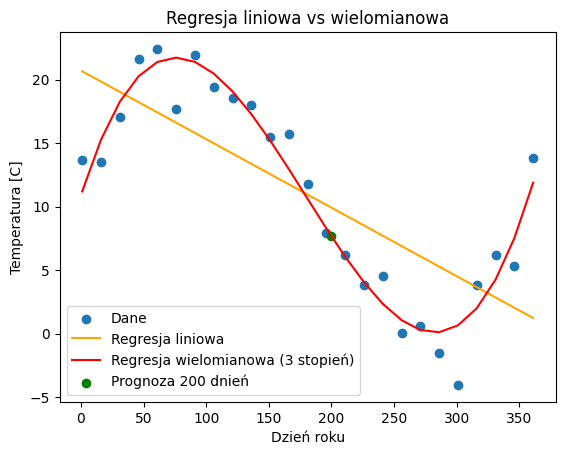

In [11]:
#prognoza
dzien200_poly = poly.transform([[200]])
prognoza200 = model_poly.predict(dzien200_poly)
#wykres
plt.scatter(dzien,temp,label='Dane')
plt.plot(dzien,temp_lin_pred,color='orange',label='Regresja liniowa')
plt.plot(dzien,temp_poly_pred,color='red',label='Regresja wielomianowa (3 stopień)')
plt.scatter(200,prognoza200,color='green',label='Prognoza 200 dnień')
plt.xlabel('Dzień roku')
plt.ylabel('Temperatura [C]')
plt.title('Regresja liniowa vs wielomianowa')
plt.legend()
plt.show()